In [ ]:
import os
import math
import torch
import torch.nn.functional as F
import random
import librosa
import torchaudio
from tqdm import tqdm
from train.dataset import Config
from train.dataset import SampleDataset
from config.model.config import config
from torch.utils.data import Dataset, DataLoader, RandomSampler
from condition.voice import make_voice_cond

In [ ]:
config = Config(
    train_dataset='./train_ld_23.csv', 
    valid_dataset='./valid_ld_23.csv', 
    duration=10.0
)

train_dataset = SampleDataset(config, mode="train", sample_rate=44100, force_channels='stereo')
valid_dataset = SampleDataset(config, mode="valid", sample_rate=44100, force_channels='stereo')

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_chromagram(chromagram, sample_rate):
    """
    시각화 함수
    """
    plt.figure(figsize=(10, 6))
    # chromagram을 NumPy 배열로 변환
    chroma_np = chromagram.cpu().detach().numpy()  # 텐서를 NumPy로 변환
    # 시각화
    plt.imshow(chroma_np, aspect='auto', origin='lower', cmap='coolwarm', interpolation='nearest')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Frames')
    plt.ylabel('Chroma Bins')
    plt.title('Chromagram')
    plt.show()

In [ ]:
from audiotools import AudioSignal

data = train_dataset[i]
melody = data[1]['melody']
AudioSignal(data[0], sample_rate=44100).widget()
visualize_chromagram(melody[4:], 44100)

In [ ]:
from audiotools import AudioSignal

for i in range(10):
    data = train_dataset[i]
    melody = data[1]['melody']
    AudioSignal(data[0], sample_rate=44100).widget()
    visualize_chromagram(melody[4:], 44100)

In [ ]:
import pandas as pd

df = pd.read_csv('./train_ld_234.csv')
print(len(df))
print(len(df[df['duration']<20]))

df = df[df['duration']<20]
df.to_csv('./train_ld_234_u20.csv')

In [ ]:
df = df[df['duration']<15]
df.to_csv('./valid_ld_23_u15.csv')

In [ ]:
import pandas as pd

df = pd.read_csv('./valid_ld_234.csv')
print(len(df))

In [ ]:
abs(0.1)

In [ ]:
from audiotools import AudioSignal

AudioSignal("/workspace/landr_4/part_2/packs-grindin/02_Grindin_G#mn_158bpm_percussion loop.mp3").widget()

# 1.7785260770975058 12.151995464852607

In [1]:
import pandas as pd

df = pd.read_csv('./valid_0205.csv')
df[:16000].to_csv('valid_16.csv')

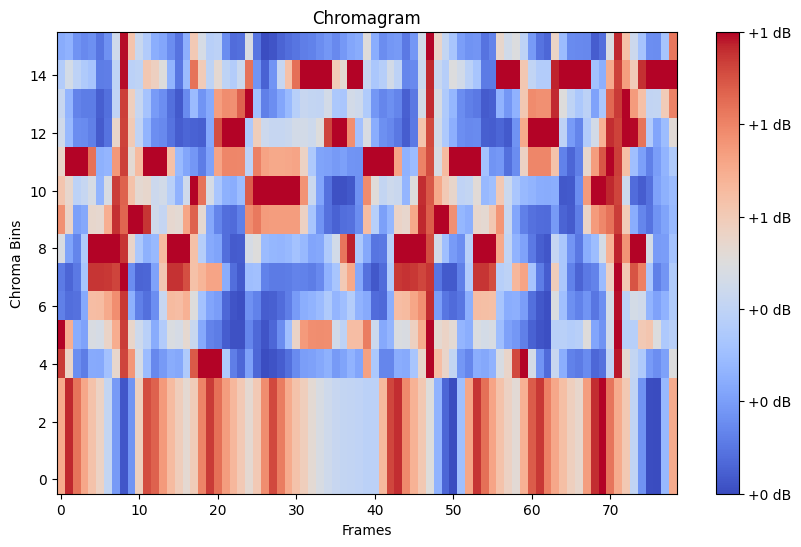

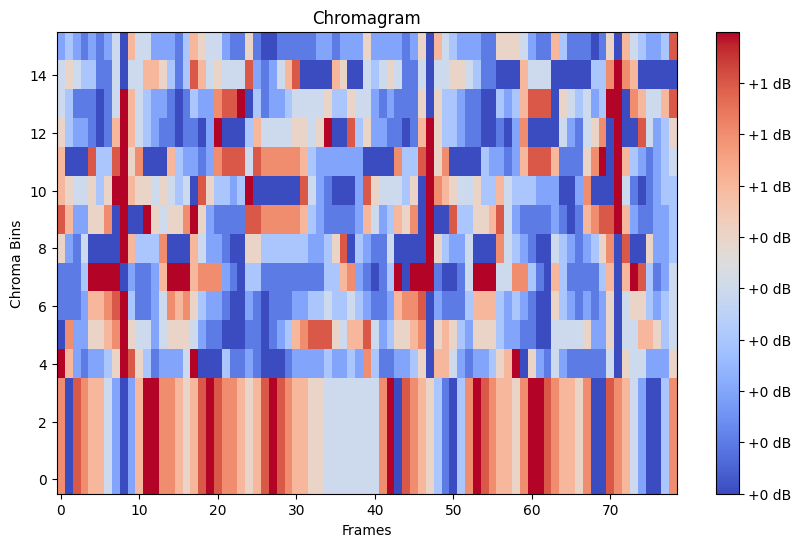

In [12]:
import librosa
import torch
from condition.voice import make_voice_cond

audio, sr = librosa.load('/workspace/mel_con_sample/testsamples/bass_synth.wav', sr=44100)
audio = torch.tensor(audio)
melody = make_voice_cond(audio)

visualize_chromagram(melody, 44100)
quantized_x = quantize_tensor(melody, quant_levels)
visualize_chromagram(quantized_x, 44100)


In [10]:
import torch

quant_levels = [
    (0.00, 0.05, 0.0),
    (0.05, 0.15, 0.1),
    (0.15, 0.25, 0.2),
    (0.25, 0.35, 0.3),
    (0.35, 0.45, 0.4),
    (0.45, 0.55, 0.5),
    (0.55, 0.65, 0.6),
    (0.65, 0.75, 0.7),
    (0.75, 0.85, 0.8),
    (0.85, 0.95, 0.9),
    (0.95, 0.1, 1.0),
]

def quantize_tensor(tensor, quant_levels):
    quantized = torch.zeros_like(tensor)
    
    for min_val, max_val, target_value in quant_levels:
        mask = (tensor >= min_val) & (tensor <= max_val)
        quantized[mask] = target_value

    return quantized

quantized_x = quantize_tensor(melody, quant_levels)

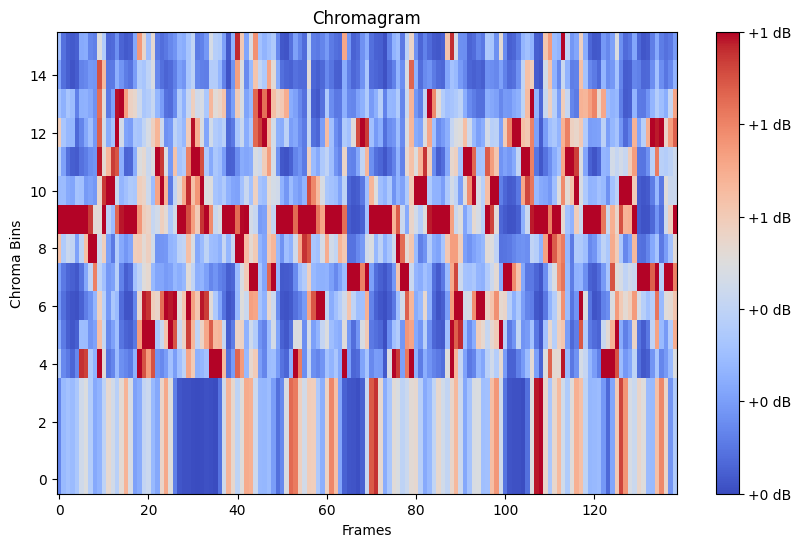

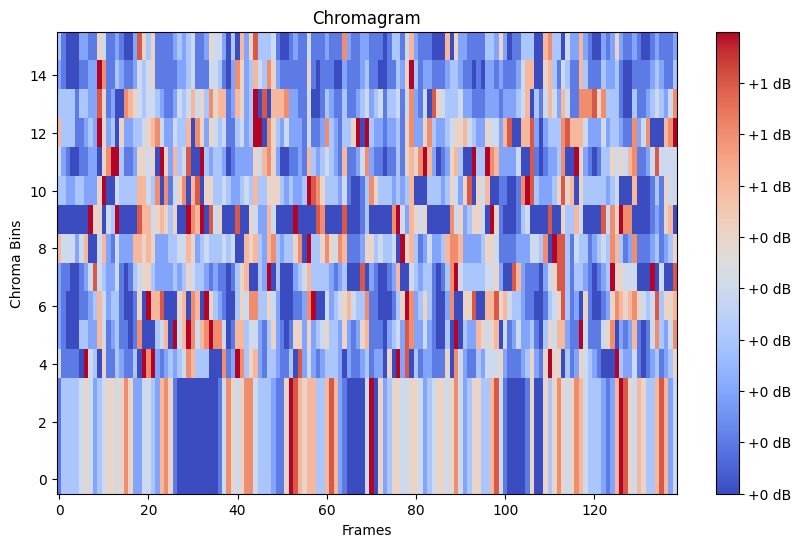

In [26]:
import librosa
import torch
from condition.voice import make_voice_cond

audio, sr = librosa.load('/workspace/mel_con_sample/testsamples/hiphop_vocal.wav', sr=44100)
audio = torch.tensor(audio)
melody = make_voice_cond(audio)

visualize_chromagram(melody, 44100)
quantized_x = quantize_tensor(melody, quant_levels)
visualize_chromagram(quantized_x, 44100)


mask_ratio :  0.2


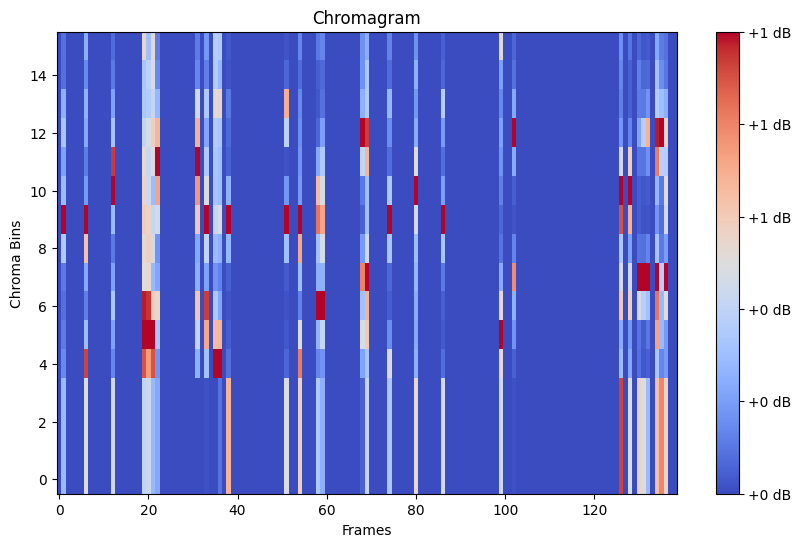

In [32]:
import torch
import random

def mask_random_columns(tensor, mask_ratios=(0.1, 0.4)):
    # assert tensor.shape == (64, 215), "Input tensor must have shape (64, 215)"
    mask_ratio = [0.1, 0.2, 0.3, 0.4][random.randint(0, 3)]
    print('mask_ratio : ', mask_ratio)

    num_columns = tensor.shape[1]  # 215
    num_masked = int(num_columns * mask_ratio)  # 마스킹할 column 개수 (10%면 약 21개)
    masked_indices = torch.randperm(num_columns)[:num_masked]

    tensor[:, masked_indices] = 0

    return tensor

masked_x = mask_random_columns(melody)
visualize_chromagram(masked_x, 44100)